# Applying Classification Modeling
The goal of this week's assessment is to find the model which best predicts whether a person will default on their loan. In doing so, we want to utilize all of the different tools we have learned over the course: data cleaning, EDA, feature engineering/transformation, feature selection, hyperparameter tuning, and model evaluation. 

Dataset: The dataset comes customers default payments in Taiwan. More information about the dataset and columns are found in the link below.

https://archive.ics.uci.edu/ml/datasets/default+of+credit+card+clients#


You will fit three different models (KNN, Logistic Regression, and Decision Tree Classifier) and use gridsearch to find the best hyperparameters for those models. Then you will compare the performance of those three models on a test set to find the best one.  


## Process/Expectations

#### You will be working in pairs for this assessment; please have ONE notebook and be prepared to explain how you worked in your pair.
1. Clean up your data set so that you can do EDA. This includes handling null values, categorical variables, removing unimportant columns, and removing outliers.
2. Perform EDA to identify opportunities to create new features.
    - [Great Example of EDA for classification](https://www.kaggle.com/stephaniestallworth/titanic-eda-classification-end-to-end) 
    - [Using Pairplots with Classification](https://towardsdatascience.com/visualizing-data-with-pair-plots-in-python-f228cf529166)
3. Create polynomial and/or interaction features. You must also create at least 2 new features that are not interactions or polynomial transformations. For example, you can create a new dummy variable that based on the value of a continuous variable (billamount6 >2000) or take the average of some past amounts.
4. Perform some feature selction. This can happen beforehand using F-scores, or you can do it as part of your model building process by looking at the weights of your regularized logistic regression or feature importance of your decision tree.  
5. You must fit each of the three models to your data and tune at least 1 hyperparameter per model. 
6. After identifying the best hyperparameters for each model, fit those models to the test set and identify the best model overall using the evaluation metric of your choice.
7. Present your best model.

In [123]:
# import libraries
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np
%matplotlib inline
import sklearn
import warnings
warnings.filterwarnings('ignore')
pd.set_option('display.max_columns', None)
from sklearn.model_selection import train_test_split
from sklearn import linear_model
from sklearn.metrics import mean_squared_error
from sklearn.metrics import mean_absolute_error
#
from sklearn.preprocessing import PolynomialFeatures
poly = PolynomialFeatures()
#
import os
import numpy as np
import scipy.stats as stats
from statsmodels.formula.api import ols
import statsmodels.api as sm
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
from statsmodels.stats.multicomp import pairwise_tukeyhsd
from statsmodels.stats.multicomp import MultiComparison
#
from sklearn.preprocessing import LabelEncoder
make_lb = LabelEncoder()
#
from sklearn.preprocessing import LabelBinarizer
lbb = LabelBinarizer()
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
from sklearn.preprocessing import MinMaxScaler
minmax = MinMaxScaler()
from sklearn.linear_model import LogisticRegression

## 1. Data Cleaning

In [3]:
df = pd.read_csv('student_data.csv')

In [4]:
df['default payment next month'].value_counts()

0    18691
1     5308
Name: default payment next month, dtype: int64

In [32]:
df.head()

ID  LIMIT_BAL  SEX  EDUCATION  MARRIAGE  AGE  PAY_0  PAY_2  PAY_3  \
0   2873     350000    1          1         2   37     -2     -2     -2   
1   3598      50000    2          2         1   37      2      2      2   
2  27623      50000    2          1         2   23     -1     -1     -1   
3   6874      20000    1          3         1   56      0      0      0   
4   6444     110000    2          2         2   32      0      0      0   

   PAY_4  PAY_5  PAY_6  BILL_AMT1  BILL_AMT2  BILL_AMT3  BILL_AMT4  BILL_AMT5  \
0     -2     -2     -2        316        316        316        466        466   
1      0      0      0      40994      43594      38222      13026      13268   
2     -1     -1     -1       3430       2478       2299       4800       9810   
3      0      2      0      10847      12176      12884      13784      13420   
4      0      0      0     108159     106812     108464     108829     110557   

   BILL_AMT6  PAY_AMT1  PAY_AMT2  PAY_AMT3  PAY_AMT4  PAY_AMT5  PAY_AMT6  \
0        316       316       316       466       466       316       316   
1      13497      5500         0       580       600       600       600   
2        660      2548      2321      4800      9810       660      2980   
3      13686      1508      1216      1116         0       490       658   
4     106082      5400      5400      4100      4100      4100      4200   

   default payment next month  
0                           0  
1                           0  
2                           0  
3                           0  
4                           0

In [6]:
df.columns

Index(['ID', 'LIMIT_BAL', 'SEX', 'EDUCATION', 'MARRIAGE', 'AGE', 'PAY_0',
       'PAY_2', 'PAY_3', 'PAY_4', 'PAY_5', 'PAY_6', 'BILL_AMT1', 'BILL_AMT2',
       'BILL_AMT3', 'BILL_AMT4', 'BILL_AMT5', 'BILL_AMT6', 'PAY_AMT1',
       'PAY_AMT2', 'PAY_AMT3', 'PAY_AMT4', 'PAY_AMT5', 'PAY_AMT6',
       'default payment next month'],
      dtype='object')

In [17]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 23999 entries, 0 to 23998
Data columns (total 25 columns):
ID                            23999 non-null int64
LIMIT_BAL                     23999 non-null int64
SEX                           23999 non-null int64
EDUCATION                     23999 non-null int64
MARRIAGE                      23999 non-null int64
AGE                           23999 non-null int64
PAY_0                         23999 non-null int64
PAY_2                         23999 non-null int64
PAY_3                         23999 non-null int64
PAY_4                         23999 non-null int64
PAY_5                         23999 non-null int64
PAY_6                         23999 non-null int64
BILL_AMT1                     23999 non-null int64
BILL_AMT2                     23999 non-null int64
BILL_AMT3                     23999 non-null int64
BILL_AMT4                     23999 non-null int64
BILL_AMT5                     23999 non-null int64
BILL_AMT6               

In [ ]:
## Commenting this out because it was used and doesn't need to be run again

# df.rename(columns={'default payment next month': 'default'}, inplace=True)
# df.columns=df.columns.str.lower()

In [78]:
df.groupby('EDUCATION')['LIMIT_BAL'].describe()

count           mean            std      min       25%       50%  \
EDUCATION                                                                       
0             11.0  235454.545455   86759.856658  50000.0  205000.0  230000.0   
1           8442.0  213939.824686  135341.259115  10000.0  100000.0  200000.0   
2          11188.0  147620.307472  121132.176966  10000.0   50000.0  110000.0   
3           3994.0  125369.974962  113349.121789  10000.0   50000.0   80000.0   
4            100.0  220200.000000  110608.783694  20000.0  150000.0  200000.0   
5            223.0  169264.573991  114070.773632  10000.0   80000.0  150000.0   
6             41.0  168536.585366  137178.004352  10000.0   60000.0  150000.0   

                75%        max  
EDUCATION                       
0          280000.0   360000.0  
1          300000.0  1000000.0  
2          210000.0   800000.0  
3          180000.0   750000.0  
4          272500.0   710000.0  
5          230000.0   550000.0  
6          230000.0   540000.0

X1: Amount of the given credit (NT dollar): it includes both the individual consumer credit and his/her family (supplementary) credit.
X2: Gender (1 = male; 2 = female).
X3: Education (1 = graduate school; 2 = university; 3 = high school; 4 = others).
X4: Marital status (1 = married; 2 = single; 3 = others).
X5: Age (year).
X6 - X11: History of past payment. We tracked the past monthly payment records (from April to September, 2005) as follows: X6 = the repayment status in September, 2005; X7 = the repayment status in August, 2005; . . .;X11 = the repayment status in April, 2005. The measurement scale for the repayment status is: -1 = pay duly; 1 = payment delay for one month; 2 = payment delay for two months; . . .; 8 = payment delay for eight months; 9 = payment delay for nine months and above.
X12-X17: Amount of bill statement (NT dollar). X12 = amount of bill statement in September, 2005; X13 = amount of bill statement in August, 2005; . . .; X17 = amount of bill statement in April, 2005.
X18-X23: Amount of previous payment (NT dollar). X18 = amount paid in September, 2005; X19 = amount paid in August, 2005; . . .;X23 = amount paid in April, 2005.

In [24]:
df[['PAY_0', 'PAY_2', 'PAY_3', 'PAY_4', 'PAY_5', 'PAY_6']]

PAY_0  PAY_2  PAY_3  PAY_4  PAY_5  PAY_6
0         -2     -2     -2     -2     -2     -2
1          2      2      2      0      0      0
2         -1     -1     -1     -1     -1     -1
3          0      0      0      0      2      0
4          0      0      0      0      0      0
...      ...    ...    ...    ...    ...    ...
23994      0      0      0     -2     -2     -2
23995     -1     -1     -1     -1     -1     -1
23996      2      0      0      2      2      2
23997      0      0      0      0      0      0
23998      2      3      2      0      0      0

[23999 rows x 6 columns]

In [33]:
df['default payment next month'].value_counts()

0    18691
1     5308
Name: default payment next month, dtype: int64

In [35]:
df_nd = df[df['default payment next month'] == 0]
df_dp = df[df['default payment next month'] == 1]

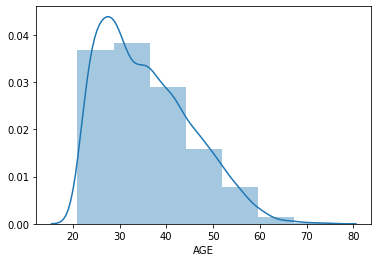

In [40]:
sns.distplot(df_dp['AGE'], bins = 7)

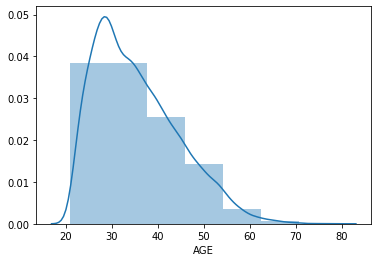

In [41]:
sns.distplot(df_nd['AGE'], bins = 7)

In [88]:
df_nd['PAY_SUM'] = df_nd.apply(lambda row: row.PAY_0 + row.PAY_2 + row.PAY_3 + row.PAY_4 + row.PAY_5 + row.PAY_6,
                               axis=1)

In [90]:
df_nd['PAY_SUM'].value_counts()

 0     7277
-6     1684
-12    1449
 2     1012
-1      914
-4      781
-5      732
-2      716
-3      693
-9      489
-7      428
 3      333
-8      328
 4      297
-10     197
 6      189
 5      186
 1      167
 8      147
 7      144
 12     119
 11     112
 9       75
-11      59
 10      47
 13      26
 14      21
 20      11
 15       8
 16       8
 33       5
 21       5
 18       4
 22       4
 32       4
 17       3
 31       3
 19       3
 28       3
 24       2
 27       2
 23       2
 25       1
 30       1
Name: PAY_SUM, dtype: int64

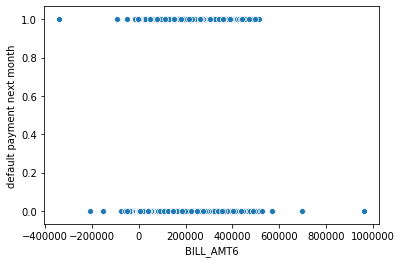

In [53]:
sns.scatterplot(x=df['BILL_AMT6'], y=df['default payment next month'])

In [52]:
df_dp['BILL_AMT6'].value_counts()

0         747
390        42
2400       23
780        23
316        18
         ... 
62756       1
81185       1
29980       1
1306        1
172666      1
Name: BILL_AMT6, Length: 4141, dtype: int64

In [34]:
df.corr()

ID  LIMIT_BAL       SEX  EDUCATION  \
ID                          1.000000   0.026323  0.019302   0.039845   
LIMIT_BAL                   0.026323   1.000000  0.021791  -0.222272   
SEX                         0.019302   0.021791  1.000000   0.012650   
EDUCATION                   0.039845  -0.222272  0.012650   1.000000   
MARRIAGE                   -0.030753  -0.111852 -0.028780  -0.138888   
AGE                         0.017880   0.138653 -0.092778   0.176528   
PAY_0                      -0.030291  -0.268184 -0.055882   0.104193   
PAY_2                      -0.009438  -0.294982 -0.070741   0.121222   
PAY_3                      -0.017596  -0.287556 -0.066426   0.111218   
PAY_4                      -0.001544  -0.268280 -0.059638   0.104354   
PAY_5                      -0.020004  -0.250859 -0.054899   0.094356   
PAY_6                      -0.022953  -0.235227 -0.044523   0.078879   
BILL_AMT1                   0.019890   0.286237 -0.031361   0.019929   
BILL_AMT2                   0.019154   0.279229 -0.029742   0.014137   
BILL_AMT3                   0.024291   0.285664 -0.022423   0.006409   
BILL_AMT4                   0.041000   0.298083 -0.021637  -0.006347   
BILL_AMT5                   0.016271   0.298799 -0.016335  -0.012530   
BILL_AMT6                   0.016095   0.292456 -0.015444  -0.014746   
PAY_AMT1                    0.011810   0.191768  0.003678  -0.037831   
PAY_AMT2                    0.009192   0.173765  0.001577  -0.032273   
PAY_AMT3                    0.043608   0.208623 -0.010808  -0.040125   
PAY_AMT4                    0.008645   0.201759 -0.002169  -0.035805   
PAY_AMT5                    0.000182   0.216456  0.002347  -0.040585   
PAY_AMT6                    0.003328   0.218044  0.001924  -0.032386   
default payment next month -0.012796  -0.152838 -0.039809   0.028928   

                            MARRIAGE       AGE     PAY_0     PAY_2     PAY_3  \
ID                         -0.030753  0.017880 -0.030291 -0.009438 -0.017596   
LIMIT_BAL                  -0.111852  0.138653 -0.268184 -0.294982 -0.287556   
SEX                        -0.028780 -0.092778 -0.055882 -0.070741 -0.066426   
EDUCATION                  -0.138888  0.176528  0.104193  0.121222  0.111218   
MARRIAGE                    1.000000 -0.409162  0.019692  0.023821  0.034171   
AGE                        -0.409162  1.000000 -0.039205 -0.047458 -0.049730   
PAY_0                       0.019692 -0.039205  1.000000  0.669309  0.574104   
PAY_2                       0.023821 -0.047458  0.669309  1.000000  0.768163   
PAY_3                       0.034171 -0.049730  0.574104  0.768163  1.000000   
PAY_4                       0.035525 -0.049382  0.540147  0.662633  0.775579   
PAY_5                       0.038187 -0.053114  0.511400  0.622654  0.687732   
PAY_6                       0.036491 -0.049581  0.474791  0.577261  0.632445   
BILL_AMT1                  -0.024728  0.052543  0.187273  0.234643  0.209230   
BILL_AMT2                  -0.022129  0.050526  0.190934  0.235620  0.238924   
BILL_AMT3                  -0.025063  0.050848  0.178416  0.222517  0.227723   
BILL_AMT4                  -0.023084  0.050574  0.177928  0.220298  0.226656   
BILL_AMT5                  -0.025111  0.046845  0.179828  0.219387  0.224777   
BILL_AMT6                  -0.019539  0.044077  0.176277  0.217731  0.223529   
PAY_AMT1                   -0.004430  0.022907 -0.073634 -0.076814  0.005766   
PAY_AMT2                   -0.004399  0.018468 -0.070586 -0.058941 -0.064333   
PAY_AMT3                   -0.003262  0.028111 -0.069099 -0.055361 -0.052758   
PAY_AMT4                   -0.013261  0.020261 -0.065717 -0.049048 -0.046932   
PAY_AMT5                    0.001633  0.017127 -0.056369 -0.035798 -0.032162   
PAY_AMT6                   -0.004954  0.018235 -0.056545 -0.033609 -0.033347   
default payment next month -0.021428  0.012072  0.325083  0.263629  0.238159   

                               PAY_4     PAY_5     PAY_6  BILL_AMT1  \
ID       

Suspecting the PAY_x variable has a relation with the target. The most recent PAY_x observation has the highest correlation with the target lending to the idea it might be worth while to explore as a predictor.

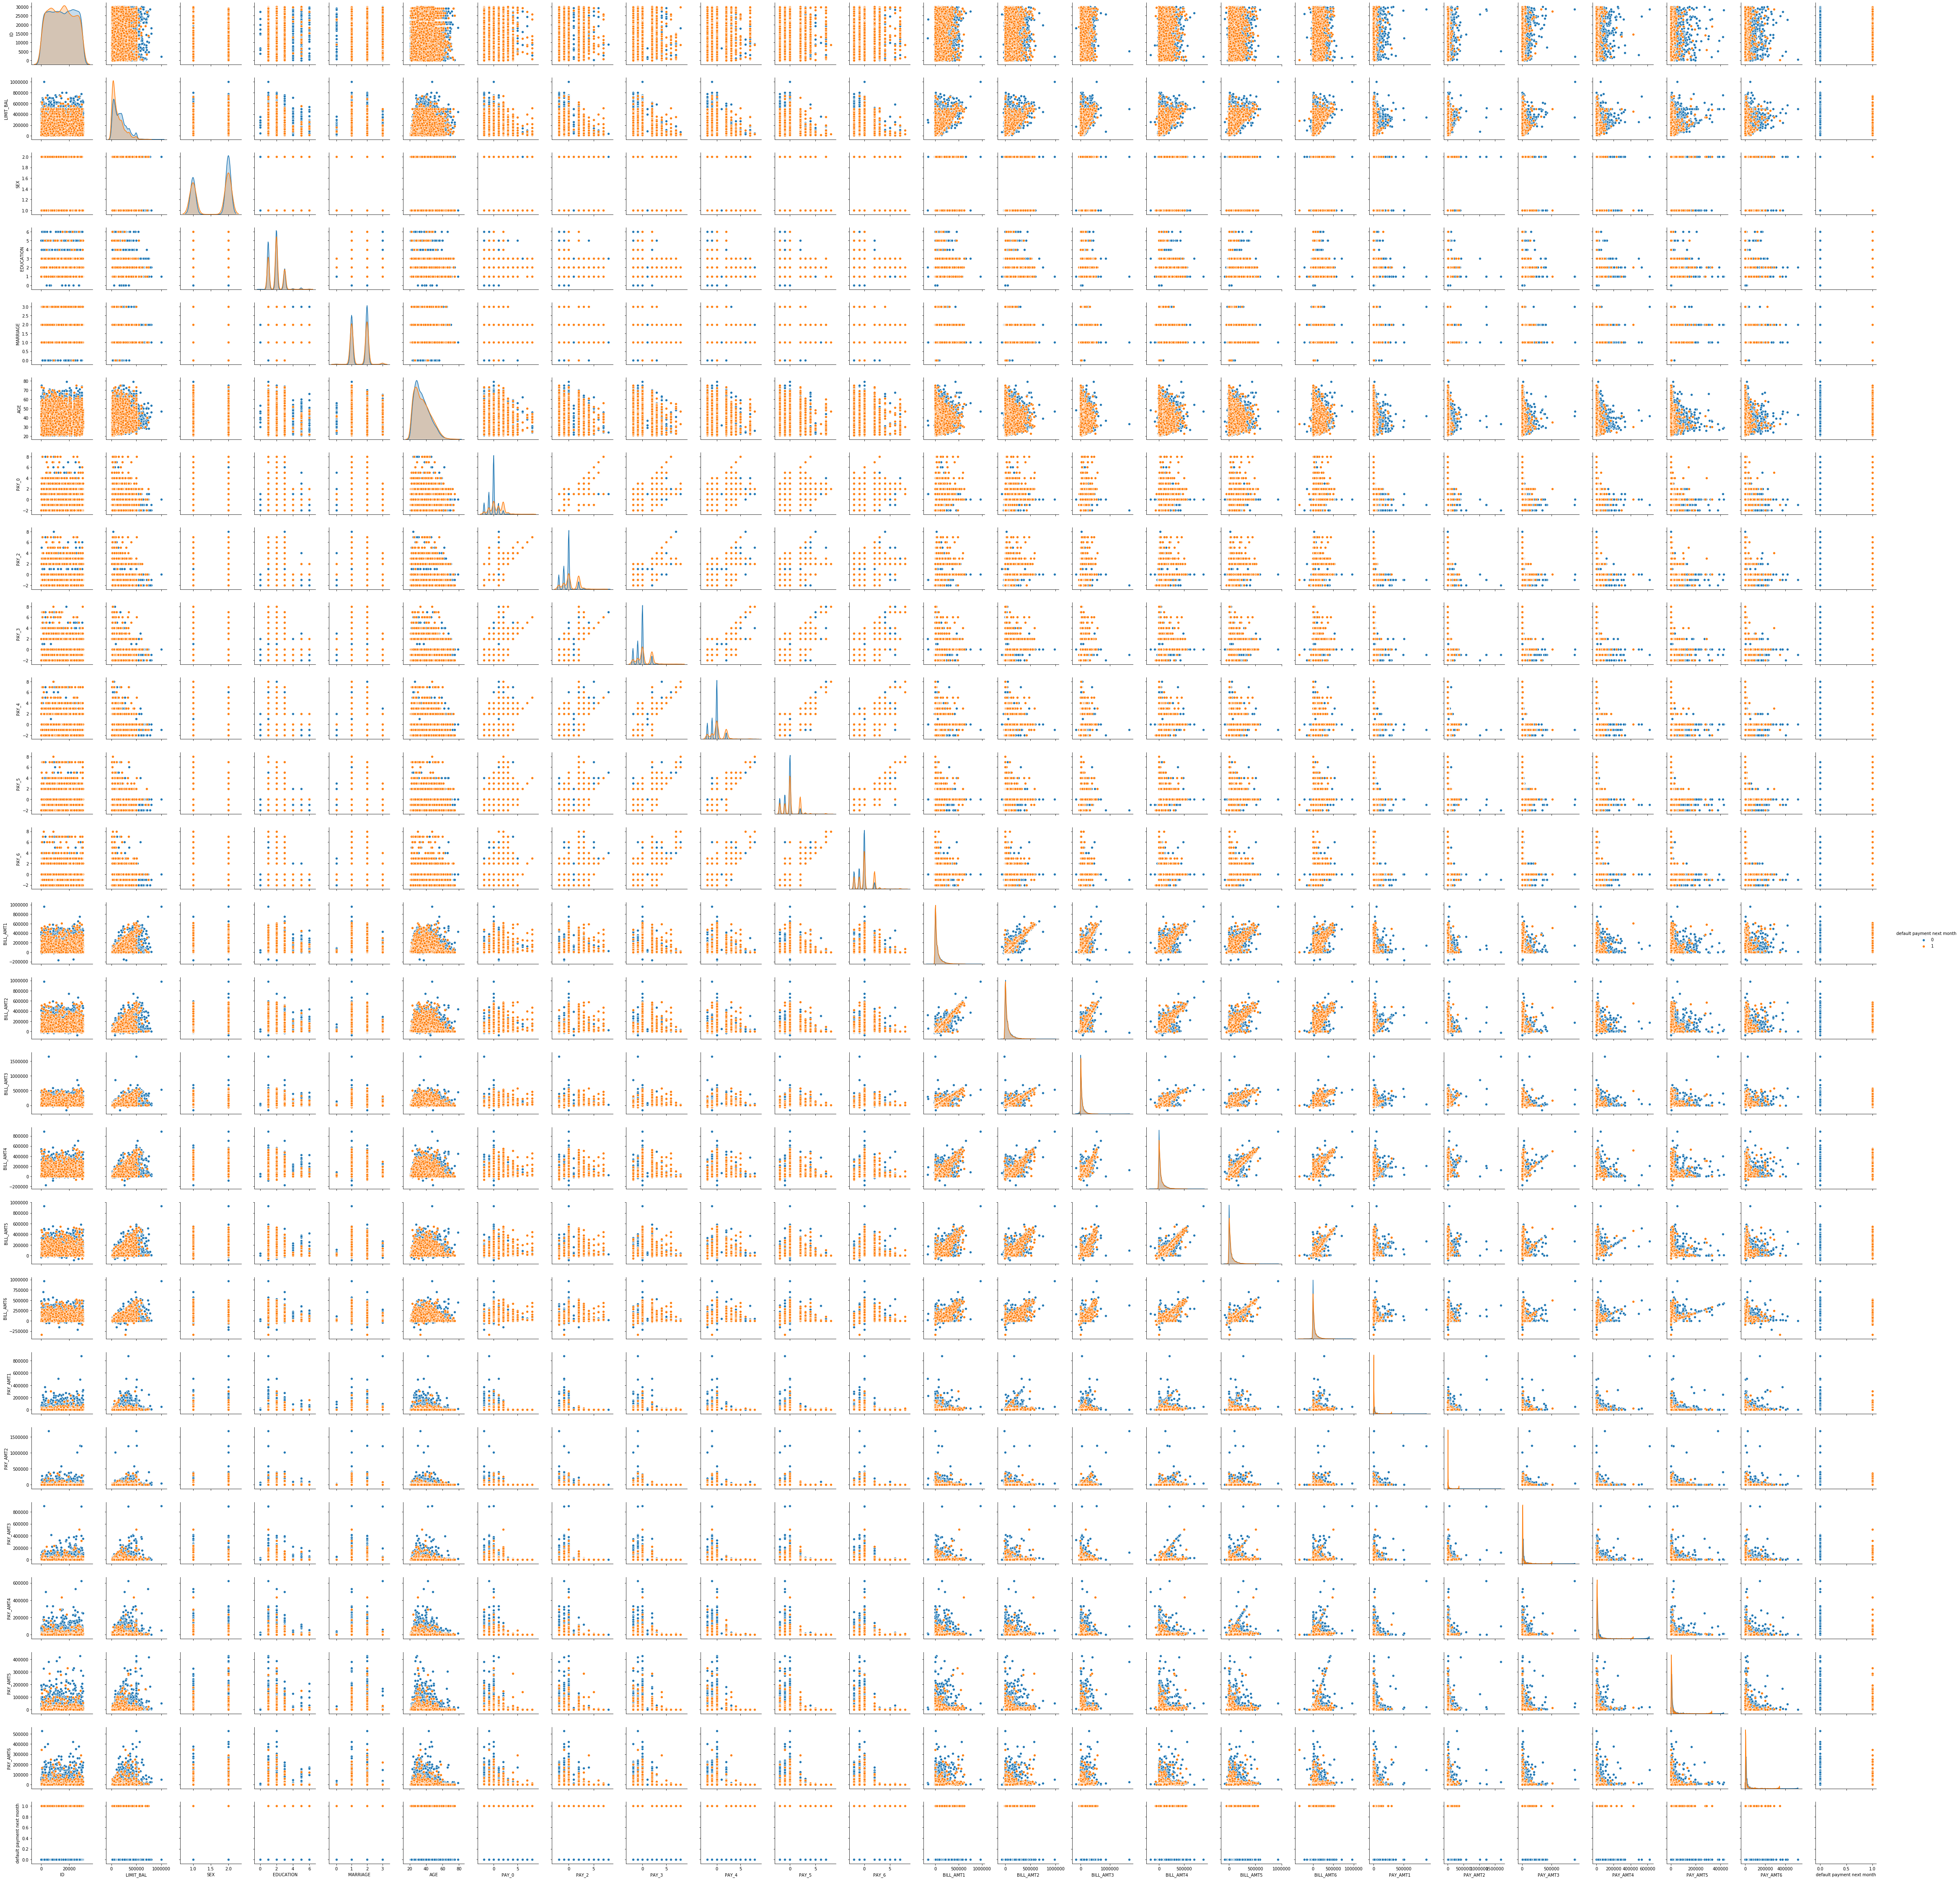

In [38]:
sns.pairplot(df, hue = 'default payment next month')

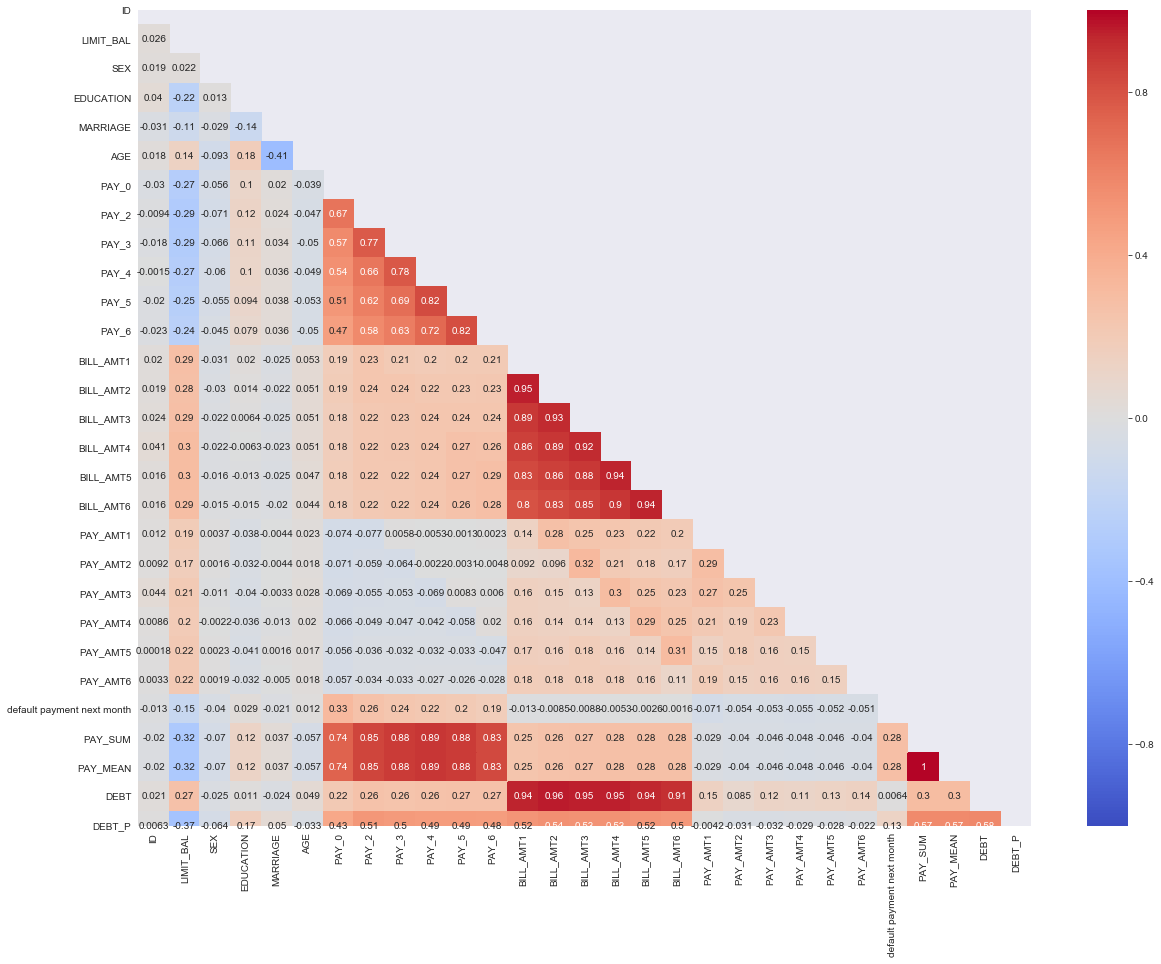

In [120]:
# Looking for multicollinearity
f, ax = plt.subplots(figsize=(20, 15))
matrix = np.triu(df.corr())
sns.heatmap(df.corr(), annot = True, vmin=-1, vmax=1, center= 0, cmap= 'coolwarm', mask = matrix)

I think the BILL_AMT and PAY_x are showing hi multicollinearity. It might be worth to see how to combine. Based on this plot I don't think certain features are likely to make a difference in the default rate. Also, a higher LIMIT_BAL is associated with a lower chance of defaulting.  
This is an example of Business Intelliegence or Business Understanding.

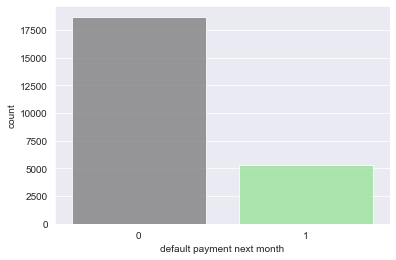

In [81]:
sns.countplot(df['default payment next month'], alpha =.80, palette= ['grey','lightgreen'])

In [65]:
df['default payment next month'].value_counts()

0    18691
1     5308
Name: default payment next month, dtype: int64

In [66]:
5308/len(df)

0.22117588232843036

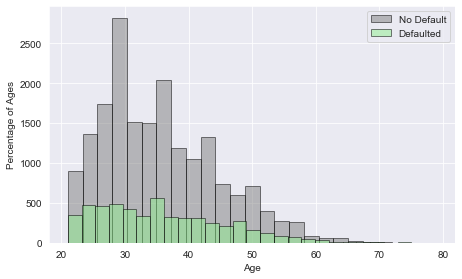

In [75]:
sns.set_style('darkgrid')
fig = plt.figure(figsize = (16,10))
fig.subplots_adjust(hspace = .30)

ax1 = fig.add_subplot(221)
ax1.hist(df[df['default payment next month'] ==0].AGE, bins = 25, label ='No Default', alpha = .50,edgecolor= 'black',color ='grey')
ax1.hist(df[df['default payment next month']==1].AGE, bins = 25, label = 'Defaulted', alpha = .50, edgecolor = 'black',color = 'lightgreen')
ax1.set_xlabel('Age')
ax1.set_ylabel('Percentage of Ages')
ax1.legend(loc = 'upper right')

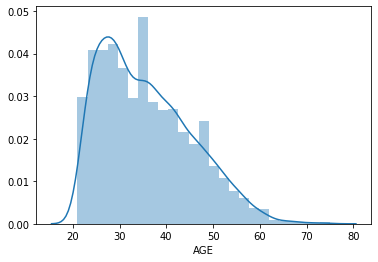

In [74]:
sns.distplot(df[df['default payment next month']==1].AGE, bins = 25, label = 'Default')

## 2. EDA

In [83]:
df['PAY_SUM'] = df.apply(lambda row: row.PAY_0 + row.PAY_2 + row.PAY_3 + row.PAY_4 + row.PAY_5 + row.PAY_6, axis=1)

In [93]:
df['PAY_MEAN'] = df.apply(lambda row: (row.PAY_0 + row.PAY_2 + row.PAY_3 + row.PAY_4 + row.PAY_5 + row.PAY_6)/6, axis=1)

In [101]:
df['DEBT'] = df.apply(lambda row: ((row.BILL_AMT6-row.PAY_AMT5) + (row.BILL_AMT5-row.PAY_AMT4) + (row.BILL_AMT4-row.PAY_AMT3)
                                   + (row.BILL_AMT3-row.PAY_AMT2) + (row.BILL_AMT2-row.PAY_AMT1) + row.BILL_AMT1), axis=1)

In [103]:
df['DEBT_P'] = df['DEBT']/df['LIMIT_BAL']

In [104]:
df.head()

ID  LIMIT_BAL  SEX  EDUCATION  MARRIAGE  AGE  PAY_0  PAY_2  PAY_3  \
0   2873     350000    1          1         2   37     -2     -2     -2   
1   3598      50000    2          2         1   37      2      2      2   
2  27623      50000    2          1         2   23     -1     -1     -1   
3   6874      20000    1          3         1   56      0      0      0   
4   6444     110000    2          2         2   32      0      0      0   

   PAY_4  PAY_5  PAY_6  BILL_AMT1  BILL_AMT2  BILL_AMT3  BILL_AMT4  BILL_AMT5  \
0     -2     -2     -2        316        316        316        466        466   
1      0      0      0      40994      43594      38222      13026      13268   
2     -1     -1     -1       3430       2478       2299       4800       9810   
3      0      2      0      10847      12176      12884      13784      13420   
4      0      0      0     108159     106812     108464     108829     110557   

   BILL_AMT6  PAY_AMT1  PAY_AMT2  PAY_AMT3  PAY_AMT4  PAY_AMT5  PAY_AMT6  \
0        316       316       316       466       466       316       316   
1      13497      5500         0       580       600       600       600   
2        660      2548      2321      4800      9810       660      2980   
3      13686      1508      1216      1116         0       490       658   
4     106082      5400      5400      4100      4100      4100      4200   

   default payment next month  PAY_SUM  PAY_MEAN      DEBT    DEBT_P  
0                           0      -12 -2.000000     316.0  0.000903  
1                           0        6  1.000000  155321.0  3.106420  
2                           0       -6 -1.000000    3338.0  0.066760  
3                           0        2  0.333333   72467.0  3.623350  
4                           0        0  0.000000  625803.0  5.689118

In [86]:
# Is the PAY_SUM related to the default rate in any way?
df.groupby('default payment next month')['PAY_SUM'].describe()

count      mean       std   min  25%  50%  75%  \
default payment next month                                                     
0                           18691.0 -1.966936  5.023485 -12.0 -5.0  0.0  0.0   
1                            5308.0  2.044461  7.433462 -12.0 -2.0  2.0  7.0   

                             max  
default payment next month        
0                           33.0  
1                           36.0

In [116]:
# I think this will ask for some sort of comparison test
# I will see if the means are statisically different
# If they are, it may be that an average PAY score is associated with non-defaulting customers
# Two sample t test to see if the means are significantly different
# Due to size and variance difference, Welch's T-Test
t_test = stats.ttest_ind(df.loc[lambda df: df['default payment next month'] == 0]['PAY_SUM'],
                         df.loc[lambda df: df['default payment next month'] == 1]['PAY_SUM'], equal_var=False)
# t-critical value is 1.282 from chart
if t_test[0] > 1.282:
    print('Can reject the null hypothesis that the means of the two groups\narethesame in favor of the alternate stating the mean price of hosts who respond 100% of the time is higher than hosts who do not respond 100% of the time.')
else:
    print('Cannot reject the null hypothesis.')

Cannot reject the null hypothesis.


In [99]:
# How about the average PAY_MEAN to default rate?
df.groupby('default payment next month')['PAY_MEAN'].describe()

count      mean       std  min       25%  \
default payment next month                                               
0                           18691.0 -0.327823  0.837247 -2.0 -0.833333   
1                            5308.0  0.340744  1.238910 -2.0 -0.333333   

                                 50%       75%  max  
default payment next month                           
0                           0.000000  0.000000  5.5  
1                           0.333333  1.166667  6.0

In [117]:
# If they are, it may be that an average PAY MEAN is associated with non-defaulting customers
# Two sample t test to see if the means are significantly different
# Due to size and variance difference, Welch's T-Test
t_test = stats.ttest_ind(df.loc[lambda df: df['default payment next month'] == 0]['PAY_MEAN'],
                         df.loc[lambda df: df['default payment next month'] == 1]['PAY_MEAN'], equal_var=False)
# t-critical value is 1.282 from chart
if t_test[0] > 1.282:
    print('Can reject the null hypothesis that the means of the two groups\narethesame in favor of the alternate stating the mean price of hosts who respond 100% of the time is higher than hosts who do not respond 100% of the time.')
else:
    print('Cannot reject the null hypothesis.')

Cannot reject the null hypothesis.


In [105]:
# How about DEBT PERCENTAGE to default rate?
df.groupby('default payment next month')['DEBT_P'].describe()

count      mean       std       min       25%  \
default payment next month                                                    
0                           18691.0  1.909579  2.003999 -7.430924  0.040932   
1                            5308.0  2.531793  2.142431 -3.645633  0.090311   

                                 50%      75%       max  
default payment next month                               
0                           1.185467  3.62394  31.32135  
1                           2.565213  4.52221  15.38734

In [118]:
# I think this will ask for some sort of comparison test
# I will see if the means are statisically different
# If they are, it may be that an average PAY score is associated with non-defaulting customers
# Two sample t test to see if the means are significantly different
# Due to size and variance difference, Welch's T-Test
t_test = stats.ttest_ind(df.loc[lambda df: df['default payment next month'] == 0]['DEBT_P'],
                         df.loc[lambda df: df['default payment next month'] == 1]['DEBT_P'], equal_var=False)
# t-critical value is 1.282 from chart
if t_test[0] > 1.282:
    print('Can reject the null hypothesis that the means of the two groups\narethesame in favor of the alternate stating the mean price of hosts who respond 100% of the time is higher than hosts who do not respond 100% of the time.')
else:
    print('Cannot reject the null hypothesis.')

Cannot reject the null hypothesis.


If `debt percentage` isn't different amongst the groups of default vs non default it makes no sense in comparing the two groups based on this metric. If there was a different then we could say that maybe if people have a high debt percentage the risk of default is higher but it makes sense that people may put a large purchase on a card to pay it off over time.  

However, how about `debt percentage` interaction with the pay score?


## 3. Feature Engineering

In [142]:
# Make a falling behind payments column using PAY_0
# PAY_0 is the most recent PAY rating meaning how far behind or ahead an individual is
# PAY_0 also has the highest correlation with 'default'

df2 = df


# df['PAY_STATUS'] = [x if (df.apply(lambda row: row.PAY_0 + row.PAY_2, axis=1)) <= 1 x = 0 elif (df.apply(lambda row: row.PAY_0 + row.PAY_2, axis=1)) > 1]

In [143]:
df2.head()

id  limit_bal  sex  education  marriage  age  pay_0  pay_2  pay_3  \
0   2873     350000    1          1         2   37     -2     -2     -2   
1   3598      50000    2          2         1   37      2      2      2   
2  27623      50000    2          1         2   23     -1     -1     -1   
3   6874      20000    1          3         1   56      0      0      0   
4   6444     110000    2          2         2   32      0      0      0   

   pay_4  pay_5  pay_6  bill_amt1  bill_amt2  bill_amt3  bill_amt4  bill_amt5  \
0     -2     -2     -2        316        316        316        466        466   
1      0      0      0      40994      43594      38222      13026      13268   
2     -1     -1     -1       3430       2478       2299       4800       9810   
3      0      2      0      10847      12176      12884      13784      13420   
4      0      0      0     108159     106812     108464     108829     110557   

   bill_amt6  pay_amt1  pay_amt2  pay_amt3  pay_amt4  pay_amt5  pay_amt6  \
0        316       316       316       466       466       316       316   
1      13497      5500         0       580       600       600       600   
2        660      2548      2321      4800      9810       660      2980   
3      13686      1508      1216      1116         0       490       658   
4     106082      5400      5400      4100      4100      4100      4200   

   default  pay_sum  pay_mean      debt    debt_p  
0        0      -12 -2.000000     316.0  0.000903  
1        0        6  1.000000  155321.0  3.106420  
2        0       -6 -1.000000    3338.0  0.066760  
3        0        2  0.333333   72467.0  3.623350  
4        0        0  0.000000  625803.0  5.689118

In [152]:
col_dums = ['sex', 'education', 'marriage']
df2.drop(columns=['sex', 'education', 'marriage'])
# Accessing the column values from the original DF
# Won't run into issues
col_dums = pd.get_dummies(df[col_dums], drop_first=True)
col_dums
# df_dum = pd.concat([df2, col_dums], axis=1)
# df_dum

sex  education  marriage
0        1          1         2
1        2          2         1
2        2          1         2
3        1          3         1
4        2          2         2
...    ...        ...       ...
23994    2          1         2
23995    1          3         1
23996    1          3         2
23997    2          2         1
23998    1          1         2

[23999 rows x 3 columns]

## 4. Feature Selection

In [126]:
df.head()

id  limit_bal  sex  education  marriage  age  pay_0  pay_2  pay_3  \
0   2873     350000    1          1         2   37     -2     -2     -2   
1   3598      50000    2          2         1   37      2      2      2   
2  27623      50000    2          1         2   23     -1     -1     -1   
3   6874      20000    1          3         1   56      0      0      0   
4   6444     110000    2          2         2   32      0      0      0   

   pay_4  pay_5  pay_6  bill_amt1  bill_amt2  bill_amt3  bill_amt4  bill_amt5  \
0     -2     -2     -2        316        316        316        466        466   
1      0      0      0      40994      43594      38222      13026      13268   
2     -1     -1     -1       3430       2478       2299       4800       9810   
3      0      2      0      10847      12176      12884      13784      13420   
4      0      0      0     108159     106812     108464     108829     110557   

   bill_amt6  pay_amt1  pay_amt2  pay_amt3  pay_amt4  pay_amt5  pay_amt6  \
0        316       316       316       466       466       316       316   
1      13497      5500         0       580       600       600       600   
2        660      2548      2321      4800      9810       660      2980   
3      13686      1508      1216      1116         0       490       658   
4     106082      5400      5400      4100      4100      4100      4200   

   default  pay_sum  pay_mean      debt    debt_p  
0        0      -12 -2.000000     316.0  0.000903  
1        0        6  1.000000  155321.0  3.106420  
2        0       -6 -1.000000    3338.0  0.066760  
3        0        2  0.333333   72467.0  3.623350  
4        0        0  0.000000  625803.0  5.689118

## 5. Model Fitting and Hyperparameter Tuning
KNN, Logistic Regression, Decision Tree

Going to make a model based on the features I have now  
Then I will be removing some features by hand  
Then I will remove via Feature Selection Methods  
Then I will start to test out other methods  

In [138]:
X = df.drop(columns=['id', 'default'], axis=1)
y = df.default
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=42, test_size=0.2)

In [139]:
X.head()

limit_bal  sex  education  marriage  age  pay_0  pay_2  pay_3  pay_4  \
0     350000    1          1         2   37     -2     -2     -2     -2   
1      50000    2          2         1   37      2      2      2      0   
2      50000    2          1         2   23     -1     -1     -1     -1   
3      20000    1          3         1   56      0      0      0      0   
4     110000    2          2         2   32      0      0      0      0   

   pay_5  pay_6  bill_amt1  bill_amt2  bill_amt3  bill_amt4  bill_amt5  \
0     -2     -2        316        316        316        466        466   
1      0      0      40994      43594      38222      13026      13268   
2     -1     -1       3430       2478       2299       4800       9810   
3      2      0      10847      12176      12884      13784      13420   
4      0      0     108159     106812     108464     108829     110557   

   bill_amt6  pay_amt1  pay_amt2  pay_amt3  pay_amt4  pay_amt5  pay_amt6  \
0        316       316       316       466       466       316       316   
1      13497      5500         0       580       600       600       600   
2        660      2548      2321      4800      9810       660      2980   
3      13686      1508      1216      1116         0       490       658   
4     106082      5400      5400      4100      4100      4100      4200   

   pay_sum  pay_mean      debt    debt_p  
0      -12 -2.000000     316.0  0.000903  
1        6  1.000000  155321.0  3.106420  
2       -6 -1.000000    3338.0  0.066760  
3        2  0.333333   72467.0  3.623350  
4        0  0.000000  625803.0  5.689118

In [128]:
# Fitting a baseline LogReg model
logreg = LogisticRegression(C=1e14, solver='lbfgs', fit_intercept=False)
model_1 = logreg.fit(X_train, y_train, )
dictionary = dict(zip(list(X_train.columns), list(model_1.coef_[0])))

In [129]:
dictionary

{'limit_bal': -5.409936483153674e-06,
 'sex': -8.325974637547117e-08,
 'education': -1.0265204954216475e-07,
 'marriage': -8.737969667738447e-08,
 'age': -1.496408164452997e-06,
 'pay_0': 1.0358725378636595e-07,
 'pay_2': 8.002149676700559e-08,
 'pay_3': 7.235609813086438e-08,
 'pay_4': 6.628667449507636e-08,
 'pay_5': 6.150463865067849e-08,
 'pay_6': 5.6000685818769643e-08,
 'bill_amt1': -1.7740376786342686e-05,
 'bill_amt2': -3.91958355213584e-06,
 'bill_amt3': -5.886037875487006e-06,
 'bill_amt4': -8.279061671820723e-06,
 'bill_amt5': -2.912921815505541e-06,
 'bill_amt6': -6.141513005570109e-06,
 'pay_amt1': -2.9271600515316037e-05,
 'pay_amt2': -1.6758454516392484e-05,
 'pay_amt3': -2.2279762287036725e-06,
 'pay_amt4': -6.863004234093159e-06,
 'pay_amt5': 1.9965631035373774e-06,
 'pay_amt6': -2.0034797069902474e-06,
 'pay_sum': 4.3975684764876113e-07,
 'pay_mean': 7.329280794146024e-08,
 'debt': 8.24497768410542e-06,
 'debt_p': -1.1205844247558045e-07}

In [130]:
y_pred_class = model_1.predict(X_test)
from sklearn import metrics
print(metrics.accuracy_score(y_test, y_pred_class))

0.775625


## 6. Model Evaluation

## 7. Final Model